In [28]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import torch
from transformers import AutoProcessor  

In [29]:
# 预训练CLIP模型处理器
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

In [30]:
# 预训练CLIP模型
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")

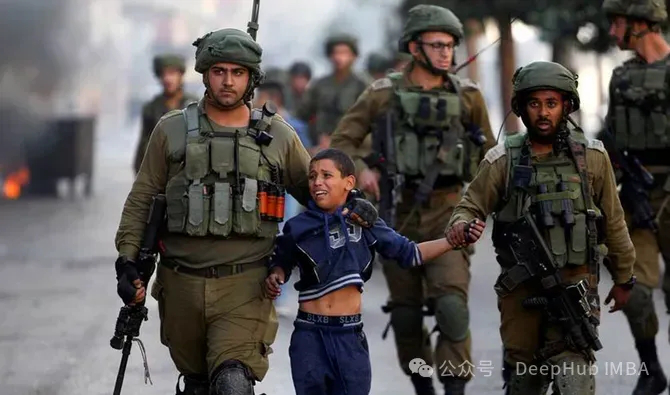

In [31]:
# 打开图片
image = Image.open("image/occupiers.png")  
image

In [32]:
# 设置标签
labels = ["a photo of occupiers", "a photo of cats"]

In [33]:
# CLIP模型输入
inputs = processor(text=labels,  
                   images=image,  
                   return_tensors="pt",  # 返回pytorch张量
                   padding=True)

In [34]:
# CLIP模型输出
outputs = model(**inputs)  

In [35]:
outputs.logits_per_image

tensor([[26.1070, 15.8459]], grad_fn=<TBackward0>)

In [36]:
# 标签概率
probs = outputs.logits_per_image.softmax(dim=1)[0]  
probs = list(probs)  
probs

[tensor(1.0000, grad_fn=<UnbindBackward0>),
 tensor(3.4964e-05, grad_fn=<UnbindBackward0>)]

In [37]:
for i in range(len(labels)):  
    print(f"label: {labels[i]} - probability of {probs[i].item():.4f}")

label: a photo of occupiers - probability of 1.0000
label: a photo of cats - probability of 0.0000
